In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
builds = pd.read_excel('../stopa_bezrobocia_za_09_2020.xlsx', skiprows=6, skipfooter=5)

In [3]:
builds.tail(3)

,Statystyczny podział kraju (rewizja NUTS 2016)\nStatistic division of the country (revision NUTS 2016)\n,Unnamed: 1,Unnamed: 2,Unnamed: 3,Wyszczególnienie \nSpecification,Bezrobotni w tys. Unemployed persons in thousands,Stopa bezrobocia w % Unemployment rate in %
98,PL924,07,2,26,PODREGION: Ostrołęcki,14.8,9.2
99,PL925,07,2,71,PODREGION: Siedlecki,11.3,6.3
100,PL926,07,2,73,PODREGION: Żyrardowski,6.0,5.5


In [4]:
left_part = builds.iloc[:, :4]

In [5]:
right_part = builds.iloc[3:, 4:]

In [6]:
PODREGIONS = right_part[right_part['Wyszczególnienie \nSpecification ']
                        .str.strip().str.startswith('PODREGION')].copy()

In [7]:
PODREGIONS['Wyszczególnienie \nSpecification '] = PODREGIONS['Wyszczególnienie \nSpecification '].str.strip().str[len('PODREGION: '):]

In [8]:
PODREGIONS.head()

,Wyszczególnienie \nSpecification,Bezrobotni w tys. Unemployed persons in thousands,Stopa bezrobocia w % Unemployment rate in %
6,Miasto Kraków,14.1,2.8
7,Krakowski,14.1,4.8
8,Tarnowski,12.5,6.6
9,Nowosądecki,16.0,7.0
10,Nowotarski,9.0,6.8


In [9]:
cutted = pd.cut(PODREGIONS.iloc[:,1], bins=5)

In [10]:
PODREGIONS['bined unemployed persons in thousands'] = cutted

In [11]:
PODREGIONS

,Wyszczególnienie \nSpecification,Bezrobotni w tys. Unemployed persons in thousands,Stopa bezrobocia w % Unemployment rate in %,bined unemployed persons in thousands
6,Miasto Kraków,14.1,2.8,"(11.78, 17.56]"
7,Krakowski,14.1,4.8,"(11.78, 17.56]"
8,Tarnowski,12.5,6.6,"(11.78, 17.56]"
9,Nowosądecki,16.0,7.0,"(11.78, 17.56]"
10,Nowotarski,9.0,6.8,"(5.971, 11.78]"
...,...,...,...,...
96,Ciechanowski,13.8,10.1,"(11.78, 17.56]"
97,Płocki,13.5,10.0,"(11.78, 17.56]"
98,Ostrołęcki,14.8,9.2,"(11.78, 17.56]"
99,Siedlecki,11.3,6.3,"(5.971, 11.78]"


# Plotting

In [12]:
PODREGIONS.groupby(PODREGIONS.columns[-1]).size()

bined unemployed persons in thousands
(5.971, 11.78]    25
(11.78, 17.56]    34
(17.56, 23.34]     9
(23.34, 29.12]     3
(29.12, 34.9]      2
dtype: int64

In [13]:
plt.style.use('seaborn')

In [14]:
from numpy.polynomial.polynomial import polyfit

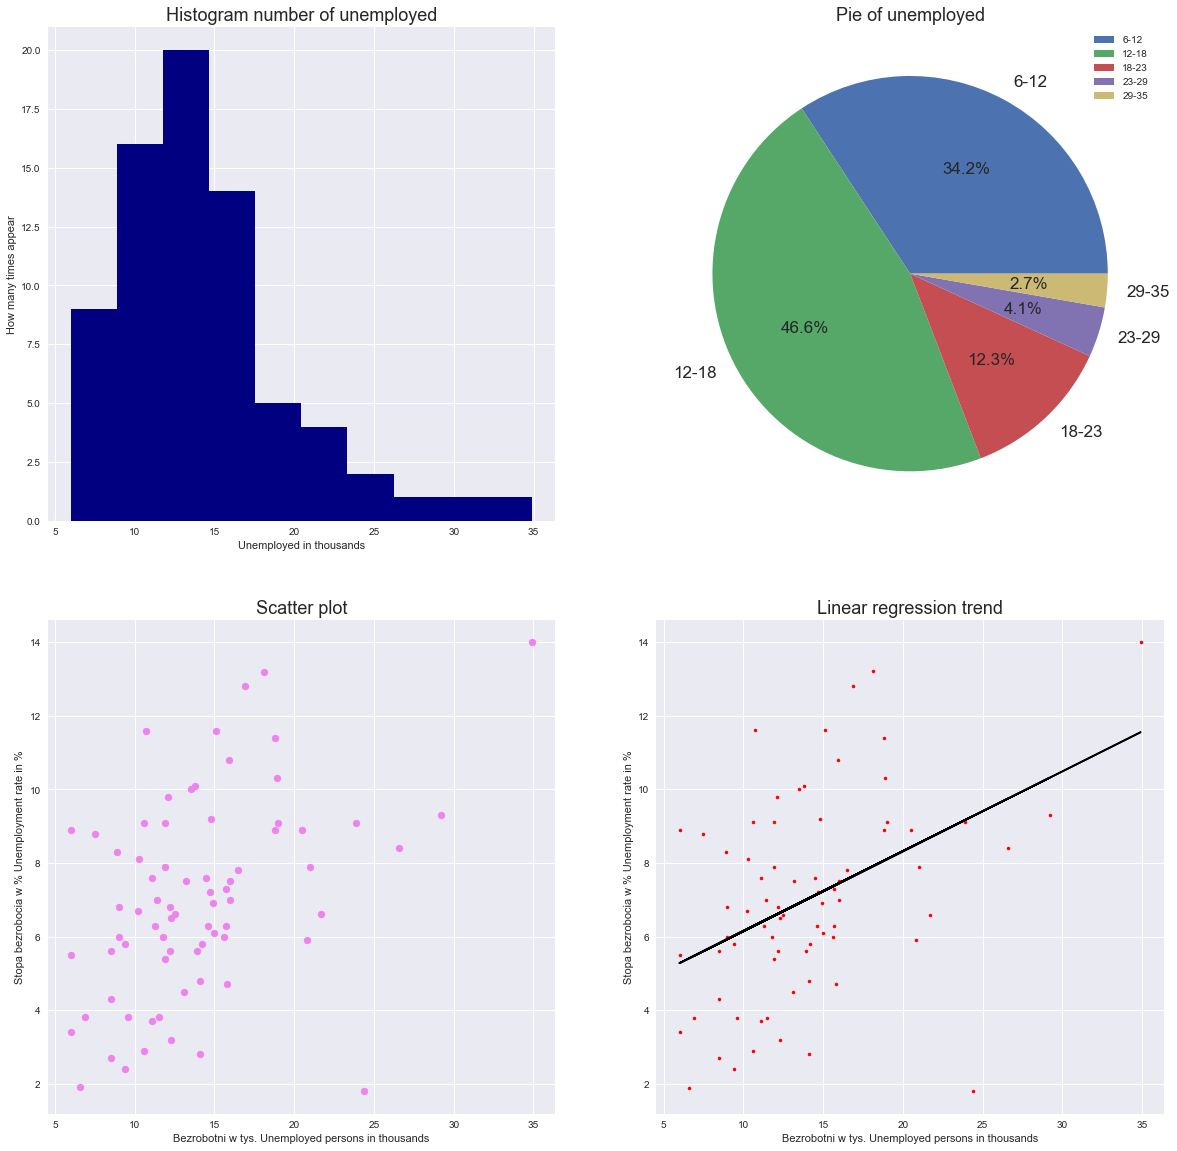

In [55]:
fig, axs = plt.subplots(2,2, figsize=(20, 20))

axs[0,0].hist(PODREGIONS.iloc[:,1],color='navy')
axs[0,0].set_title('Histogram number of unemployed', fontsize=18)
axs[0,0].set_xlabel('Unemployed in thousands')
axs[0,0].set_ylabel('How many times appear')




labels = ['6-12','12-18','18-23', '23-29', '29-35']
axs[0,1].pie(PODREGIONS.groupby(PODREGIONS.columns[-1]).size(), 
             autopct='%1.1f%%',
             labels=labels, textprops={'fontsize': 17})

axs[0,1].set_title('Pie of unemployed', fontsize=18)
axs[0,1].legend(loc='upper right')



axs[1,0].scatter(PODREGIONS.iloc[:,1], PODREGIONS.iloc[:,2], color='violet')
# wiem że ten scatter plot nie ma sensa. Prepraszam, ale takie jest data. Nie ma innych możliwości)
axs[1,0].set_title('Scatter plot', fontsize=18)
axs[1,0].set_xlabel('Bezrobotni w tys. Unemployed persons in thousands')
axs[1,0].set_ylabel('Stopa bezrobocia w % Unemployment rate in %')



axs[1,1].plot(PODREGIONS.iloc[:,1], PODREGIONS.iloc[:,2], '.', color='r')

# Liniowy chart nie jest logiczne tu pokazać, dlatego dodalem trend liniowy używając linear regression
b, m = polyfit(PODREGIONS.iloc[:,1], PODREGIONS.iloc[:,2], 1,)

axs[1,1].plot(PODREGIONS.iloc[:,1], b + m * PODREGIONS.iloc[:,1], '-', color='black')
axs[1,1].set_title('Linear regression trend', fontsize=18)
axs[1,1].set_xlabel('Bezrobotni w tys. Unemployed persons in thousands')
axs[1,1].set_ylabel('Stopa bezrobocia w % Unemployment rate in %')




'''
Wykresy maj  ̨a byc zatytułowane +
osie podpisane -
oraz legenda +
umieszczona w prawym górnym rogu +
Kolorystyka wykresów powinna byc róznorodna ale czytelna +
'''

plt.show()

# Second assignment

In [332]:
def normalize(x):
    norm1 = x / np.linalg.norm(x)
    return norm1

In [337]:
for n in normalize((2.2, 5.6, 4.3, 3.0, 0.5)):
    print(f'{n:.5f}')

0.27513
0.70033
0.53775
0.37518
0.06253
